# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [40]:
# Install required packages to reproduce Figures and Tables
!pip install pandas openpyxl
!pip install matplotlib
!pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Code for loading data from Excel file

import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = '01_Data.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

In [42]:
# Sort data by contaminant and year

# Assuming the DataFrame `df` has the following columns:
# 'Contaminant', 'Concentration 2017', 'Concentration 2023'

# Creating the lists for each category
pfoa_2017 = df[df["Contaminant "] == "PFOA"]["Concentration 2017"].tolist()
pfos_2017 = df[df["Contaminant "] == "PFOS"]["Concentration 2017"].tolist()
pfoa_2023 = df[df["Contaminant "] == "PFOA"]["Concentration 2023"].tolist()
pfos_2023 = df[df["Contaminant "] == "PFOS"]["Concentration 2023"].tolist()

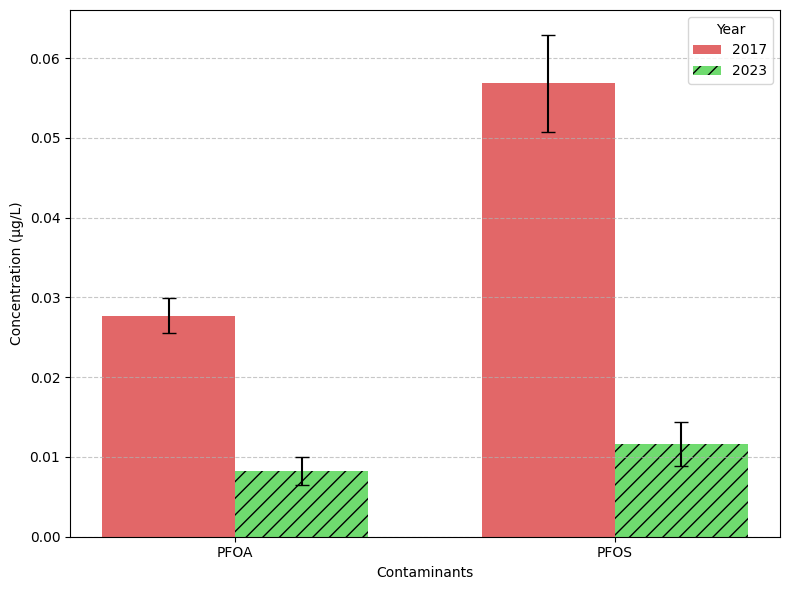

In [43]:
# Code for generating Figure 2

import matplotlib.pyplot as plt
import numpy as np

# Calculate the means of the lists
mean_pfoa_2017 = np.nanmean(pfoa_2017)
mean_pfos_2017 = np.nanmean(pfos_2017)
mean_pfoa_2023 = np.nanmean(pfoa_2023)
mean_pfos_2023 = np.nanmean(pfos_2023)

import numpy as np

# Updated function to handle NaN values in the data
def calculate_sem(data):
    data = np.array(data)
    # Remove NaN values
    clean_data = data[~np.isnan(data)]
    if len(clean_data) > 1:  # Ensure at least two valid data points
        return 2 * (np.std(clean_data, ddof=1) / np.sqrt(len(clean_data)))  # SEM for 2 SDs
    else:
        return 0  # SEM is undefined for a single valid data point or no data

# Calculate SEM for each list, handling NaN values
sem_pfoa_2017 = calculate_sem(pfoa_2017)
sem_pfos_2017 = calculate_sem(pfos_2017)
sem_pfoa_2023 = calculate_sem(pfoa_2023)
sem_pfos_2023 = calculate_sem(pfos_2023)

# Group means and SEMs for plotting
means = [
    [mean_pfoa_2017, mean_pfoa_2023],  # PFOA
    [mean_pfos_2017, mean_pfos_2023],  # PFOS
]
sems = [
    [sem_pfoa_2017, sem_pfoa_2023],  # PFOA
    [sem_pfos_2017, sem_pfos_2023],  # PFOS
]

# Setup for plotting
x = np.arange(len(means))  # Position of the clusters (PFOA and PFOS)
width = 0.35  # Width of each bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot 2017 bars
bars_2017 = ax.bar(
    x - width / 2,
    [mean[0] for mean in means],  # Means for 2017
    width,
    yerr=[sem[0] for sem in sems],  # SEMs for 2017
    label="2017",
    capsize=5,
    alpha=0.7,
    color="tab:red",
)

# Plot 2023 bars
bars_2023 = ax.bar(
    x + width / 2,
    [mean[1] for mean in means],  # Means for 2023
    width,
    yerr=[sem[1] for sem in sems],  # SEMs for 2023
    label="2023",
    capsize=5,
    alpha=0.7,
    color="limegreen",
    hatch="//",  # Add a fill pattern for 2023
)

# Add labels, title, and legend
ax.set_xlabel("Contaminants")
ax.set_ylabel("Concentration (µg/L)")
ax.set_xticks(x)
ax.set_xticklabels(["PFOA", "PFOS"])  # Labels for clusters
ax.legend(title="Year")
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.savefig("figure_2.pdf", format="pdf")

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
# Code for Table 2 and statistical analyses

import numpy as np
import scipy.stats as stats

# ---------------------------
# pfoa Data
# ---------------------------

# Convert pfoa_2017 to a NumPy array
pfoa_2017 = np.array(pfoa_2017)
# Remove NaN values
pfoa_2017_wo_nan = pfoa_2017[~np.isnan(pfoa_2017)]
# Calculate total water sources, mean, standard deviation, and variance for pfoa_2017
total_pfoa_2017 = len(pfoa_2017_wo_nan)
mean_pfoa_2017 = np.mean(pfoa_2017_wo_nan)
std_pfoa_2017 = np.nanstd(pfoa_2017)
var_pfoa_2017 = np.nanvar(pfoa_2017)  # variance ignoring NaNs

print("\npfoa_2017:")
print("Total Water Sources Tested:", total_pfoa_2017)
print("Mean (µg/L):", mean_pfoa_2017)
print("Standard Deviation (µg/L):", std_pfoa_2017)
print("Variance ((µg/L)^2):", var_pfoa_2017)

# Convert pfoa_2023 to a NumPy array
pfoa_2023 = np.array(pfoa_2023)
# Remove NaN values
pfoa_2023_wo_nan = pfoa_2023[~np.isnan(pfoa_2023)]
# Calculate total water sources, mean, standard deviation, and variance for pfoa_2023
total_pfoa_2023 = len(pfoa_2023_wo_nan)
mean_pfoa_2023 = np.mean(pfoa_2023_wo_nan)
std_pfoa_2023 = np.nanstd(pfoa_2023)
var_pfoa_2023 = np.nanvar(pfoa_2023)  # variance ignoring NaNs

print("\npfoa_2023:")
print("Total Water Sources Tested:", total_pfoa_2023)
print("Mean (µg/L):", mean_pfoa_2023)
print("Standard Deviation (µg/L):", std_pfoa_2023)
print("Variance ((µg/L)^2):", var_pfoa_2023)

# Perform Levene's test for equal variances on pfoa datasets and print the result
levene_result_pfoa = stats.levene(pfoa_2017_wo_nan, pfoa_2023_wo_nan)
print("\nLevene's test result for pfoa datasets:")
print("Statistic:", levene_result_pfoa.statistic, "P-value:", levene_result_pfoa.pvalue)

# ---------------------------
# pfos Data
# ---------------------------

# Convert pfos_2017 to a NumPy array
pfos_2017 = np.array(pfos_2017)
# Remove NaN values
pfos_2017_wo_nan = pfos_2017[~np.isnan(pfos_2017)]
# Calculate total water sources, mean, standard deviation, and variance for pfos_2017
total_pfos_2017 = len(pfos_2017_wo_nan)
mean_pfos_2017 = np.mean(pfos_2017_wo_nan)
std_pfos_2017 = np.nanstd(pfos_2017)
var_pfos_2017 = np.nanvar(pfos_2017)

print("\npfos_2017:")
print("Total Water Sources Tested:", total_pfos_2017)
print("Mean (µg/L):", mean_pfos_2017)
print("Standard Deviation (µg/L):", std_pfos_2017)
print("Variance ((µg/L)^2):", var_pfos_2017)

# Convert pfos_2023 to a NumPy array
pfos_2023 = np.array(pfos_2023)
# Remove NaN values
pfos_2023_wo_nan = pfos_2023[~np.isnan(pfos_2023)]
# Calculate total water sources, mean, standard deviation, and variance for pfos_2023
total_pfos_2023 = len(pfos_2023_wo_nan)
mean_pfos_2023 = np.mean(pfos_2023_wo_nan)
std_pfos_2023 = np.nanstd(pfos_2023)
var_pfos_2023 = np.nanvar(pfos_2023)

print("\npfos_2023:")
print("Total Water Sources Tested:", total_pfos_2023)
print("Mean (µg/L):", mean_pfos_2023)
print("Standard Deviation (µg/L):", std_pfos_2023)
print("Variance ((µg/L)^2):", var_pfos_2023)

# Perform Levene's test for equal variances on pfos datasets and print the result
levene_result_pfos = stats.levene(pfos_2017_wo_nan, pfos_2023_wo_nan)
print("\nLevene's test result for pfos datasets:")
print("Statistic:", levene_result_pfos.statistic, "P-value:", levene_result_pfos.pvalue)

# ---------------------------
# T-Tests on pfoa Data
# ---------------------------

# Perform an unpaired t-test on the pfoa datasets assuming equal variances (standard t-test)
t_stat_equal, p_value_equal = stats.ttest_ind(pfoa_2017_wo_nan, pfoa_2023_wo_nan, equal_var=True)
print("\nUnpaired t-test (assuming equal variances) on pfoa datasets:")
print("t-statistic:", t_stat_equal)
print("p-value:", p_value_equal)

# Perform an unpaired t-test on the pfoa datasets not assuming equal variances (Welch's t-test)
t_stat_welch, p_value_welch = stats.ttest_ind(pfoa_2017_wo_nan, pfoa_2023_wo_nan, equal_var=False)
print("\nUnpaired t-test (Welch's t-test) on pfoa datasets:")
print("t-statistic:", t_stat_welch)
print("p-value:", p_value_welch)

# ---------------------------
# T-Tests on pfos Data
# ---------------------------

# Perform an unpaired t-test on the pfos datasets assuming equal variances (standard t-test)
t_stat_equal2, p_value_equal2 = stats.ttest_ind(pfos_2017_wo_nan, pfos_2023_wo_nan, equal_var=True)
print("\nRepeating unpaired t-test (assuming equal variances) on pfos datasets:")
print("t-statistic:", t_stat_equal2)
print("p-value:", p_value_equal2)

# Perform an unpaired t-test on the pfos datasets not assuming equal variances (Welch's t-test)
t_stat_welch2, p_value_welch2 = stats.ttest_ind(pfos_2017_wo_nan, pfos_2023_wo_nan, equal_var=False)
print("\nRepeating unpaired t-test (Welch's t-test) on pfos datasets:")
print("t-statistic:", t_stat_welch2)
print("p-value:", p_value_welch2)



pfoa_2017:
Total Water Sources Tested: 46
Mean (µg/L): 0.027708695652173918
Standard Deviation (µg/L): 0.007292307623282893
Variance ((µg/L)^2): 5.317775047258979e-05

pfoa_2023:
Total Water Sources Tested: 25
Mean (µg/L): 0.008247999999999998
Standard Deviation (µg/L): 0.004411087847685648
Variance ((µg/L)^2): 1.9457696000000004e-05

Levene's test result for pfoa datasets:
Statistic: 3.3274773832277433 P-value: 0.07246141155574862

pfos_2017:
Total Water Sources Tested: 60
Mean (µg/L): 0.056849999999999984
Standard Deviation (µg/L): 0.0232475052424986
Variance ((µg/L)^2): 0.0005404464999999999

pfos_2023:
Total Water Sources Tested: 33
Mean (µg/L): 0.011633333333333334
Standard Deviation (µg/L): 0.007766582129855963
Variance ((µg/L)^2): 6.0319797979797986e-05

Levene's test result for pfos datasets:
Statistic: 3.013177068490532 P-value: 0.0859750112188032

Unpaired t-test (assuming equal variances) on pfoa datasets:
t-statistic: 12.013646139843136
p-value: 1.4160435322094243e-18

Unp